# **Desenvolvimento de um Perceptron *do zero*** 
Quando utilizamos um perceptron, mas também quaisquer outras redes neurais,  utilizamos um algoritmo simples que se divide em duas etapas simples (podendo ou não haver mais etapas:

1.   Treinamento - O treinamento consiste na etapa de aprendizagem supervisionada, no qual "ensinamos" ao perceptron sobre os exemplos que queremos que ele aprenda. 

2.   Validação - Na qual verificamos a solução que obtemos durante o treinamento para observar a qualidade da mesma.

3.   Teste - Quando terminamos de ensinar ao perceptron, apresentamos elementos novos à ele de forma que possa nos ajudar a classificar elementos que não conhecemos a resposta.

Dessa forma, precisamos desenvolver algumas funções básicas para que possamos treinar o nosso perceptron, isso inclui carregar os dados, definir funções e tudo mais.

# O Problema

Vamos começar definindo os dados do nosso problema: Queremos criar um neurônio que seja capaz de resolver o problema da porta lógica AND, ou seja, o perceptron deverá aprender a retornar 1 somente quando as duas entradas forem 1 e 0 caso contrário.

Então já que nosso problema é o AND, precisamos definir as 4 combinações possíveis dos sinais de 0 e 1: (0,0), (0,1), (1,0) e (1,1)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]
pd.DataFrame(data = dados, index=list(range(len(dados))), columns=['X_1', 'X_2', 'resposta'])

treinamento = pd.DataFrame(data = dados, index=list(range(len(dados))), columns=['X_1', 'X_2', 'resposta'])
treinamento['vies'] = np.repeat(1.0, treinamento.shape[0])

resposta = treinamento.resposta
treinamento = treinamento[[each for each in treinamento.columns if each != 'resposta']]
treinamento.head()

,X_1,X_2,vies
0,0,0,1.0
1,0,1,1.0
2,1,0,1.0
3,1,1,1.0


Normalmente dividiríamos os dados do nosso problema em dois conjuntos: treinamento e validação, de forma que utilizaríamos um pedaço dos dados no conjunto de treinamento para treinar e outro pedaço para validar (afinal, se usarmos tudo para treinar, vamos ficar sem exemplos que conhecemos a resposta para poder para verificar a qualidade do nosso treinamento).

Mas como o nosso conjunto é muito pequeno, não vamos fazer isso dessa vez.

Agora, vamos definir algumas funções, como as nossas funções de ativação:

*   Muitos problemas de classificação usam os valores 0 e 1 como rótulos para as respostas do problema
*   Mas há também os problemas que usam -1 e 1 como rótulos

Então para os primeiros utilizamos a função degrau e os últimos utilizamos a função sinal.



In [ ]:
def sinal(x):
    if x > 0:
        return 1.0
    elif x < 0:
        return -1.0
    else:
        return 0.0
    
    
def degrau(x):
    if x >= 0:
        return 1.0
    else:
        return 0.0

def ativacao(x, function_name):
    if function_name == 'degrau':
        return degrau(x)
    elif function_name == 'sinal':
        return sinal(x)
    else:
        raise NotImplementedError

def inicializar_pesos(num_variaveis):
    return np.zeros(num_variaveis)

def obter_resposta(vetor, pesos, funcao_ativacao):
  # Essa primeira linha faz a multiplicação dos pesos W pelos respectivos valores de X
  # e soma todos eles, facilitando a nossa vida na hora de verificar se o neurônio vai
  # ou não ativar
    somalinear = np.dot(pesos, vetor)
    saida = ativacao(somalinear, funcao_ativacao)
    return saida

Da forma que fizemos, podemos facilmente adicionar mais funções à função principal de ativação e usar qualquer uma delas, adicionando mais entradas na definição da função **ativacao**, além disso criamos a função **obter_resposta** que nos permite computar a nossa função de ativação facilmente.

Vamos tentar obter a resposta da rede para o primeiro exemplo, isto é, o exemplo no qual X1 é 0 e X2 também é 0.

In [ ]:
pesos = inicializar_pesos(treinamento.shape[1])
vetor = treinamento.loc[0].values
resposta_real = resposta.loc[0]
resposta_neuronio = obter_resposta(vetor, pesos, 'degrau')
erro = resposta_real - resposta_neuronio
print(f'Resposta do perceptron foi: {resposta_neuronio}, Resposta real é: {resposta_real}, Valor do erro: {erro}')

Resposta do perceptron foi: 1.0, Resposta real é: 0, Valor do erro: -1.0


Como podemos ver pela saída, ela errou logo de cara, então precisamos desenvolver a parte do código que atualiza os pesos de acordo com o erro obtido.

Além disso, o perceptron só viu um dos exemplos, não todos. Vamos reiniciar os pesos **que é onde fica armazenado o aprendizado do neurônio** e depois mostrar os 4 exemplos de uma vez.

Aproveitamos também para colocar a **taxa de aprendizagem** e **inicializar os pesos com 0** (embora também possamos utilizar alguma heurística para inicializá-los com algum valor diferente de 0).

In [ ]:
taxa_aprendizagem = 0.2
pesos = inicializar_pesos(treinamento.shape[1])
for elemento in range(treinamento.shape[0]):
    vetor = treinamento.loc[elemento].values
    resposta_real = resposta.loc[elemento]
    resposta_neuronio = obter_resposta(vetor, pesos, 'degrau')
    erro = resposta_real - resposta_neuronio
    print(f'Resposta do perceptron foi: {resposta_neuronio}, Resposta real é: {resposta_real}, Valor do erro: {erro}')
    pesos = pesos + erro * vetor * taxa_aprendizagem
    print(f'Pesos após a atualização: {pesos}')
print(f'Pesos depois de ver os 4 exemplos: {pesos}')    

Resposta do perceptron foi: 1.0, Resposta real é: 0, Valor do erro: -1.0
Pesos após a atualização: [ 0.   0.  -0.2]
Resposta do perceptron foi: 0.0, Resposta real é: 0, Valor do erro: 0.0
Pesos após a atualização: [ 0.   0.  -0.2]
Resposta do perceptron foi: 0.0, Resposta real é: 0, Valor do erro: 0.0
Pesos após a atualização: [ 0.   0.  -0.2]
Resposta do perceptron foi: 0.0, Resposta real é: 1, Valor do erro: 1.0
Pesos após a atualização: [0.2 0.2 0. ]
Pesos depois de ver os 4 exemplos: [0.2 0.2 0. ]


Vamos verificar se depois de olhar todos os exemplos a rede já aprendeu a resolver o AND:

In [ ]:
for elemento in range(treinamento.shape[0]):
  vetor = treinamento.loc[elemento].values
  print(obter_resposta(vetor,pesos,'degrau'))

1.0
1.0
1.0
1.0


Ela acerta o que é para ser 1, mas ainda erra os outros casos. Isso é bastante comum, um perceptron e também várias redes neurais observam diversas vezes os exemplos do conjunto de treinamento até aprender, então vamos atualizar o código para podermos escolher quantas passadas o perceptron vai poder fazer e vamos mandá-lo observar os 4 exemplos 10 vezes.

In [ ]:
taxa_aprendizagem = 0.2
pesos = inicializar_pesos(treinamento.shape[1])
for epocas in range(10):
  for elemento in range(treinamento.shape[0]):
    vetor = treinamento.loc[elemento].values
    resposta_real = resposta.loc[elemento]
    resposta_neuronio = obter_resposta(vetor, pesos, 'degrau')
    erro = resposta_real - resposta_neuronio
    print(f'Resposta do perceptron foi: {resposta_neuronio}, Resposta real é: {resposta_real}, Valor do erro: {erro}')
    pesos = pesos + erro * vetor * taxa_aprendizagem
    print(f'Pesos após a atualização: {pesos}')
print(f'Pesos depois de ver os 4 exemplos 10 vezes: {pesos}') 

Resposta do perceptron foi: 1.0, Resposta real é: 0, Valor do erro: -1.0
Pesos após a atualização: [ 0.   0.  -0.2]
Resposta do perceptron foi: 0.0, Resposta real é: 0, Valor do erro: 0.0
Pesos após a atualização: [ 0.   0.  -0.2]
Resposta do perceptron foi: 0.0, Resposta real é: 0, Valor do erro: 0.0
Pesos após a atualização: [ 0.   0.  -0.2]
Resposta do perceptron foi: 0.0, Resposta real é: 1, Valor do erro: 1.0
Pesos após a atualização: [0.2 0.2 0. ]
Resposta do perceptron foi: 1.0, Resposta real é: 0, Valor do erro: -1.0
Pesos após a atualização: [ 0.2  0.2 -0.2]
Resposta do perceptron foi: 1.0, Resposta real é: 0, Valor do erro: -1.0
Pesos após a atualização: [ 0.2  0.  -0.4]
Resposta do perceptron foi: 0.0, Resposta real é: 0, Valor do erro: 0.0
Pesos após a atualização: [ 0.2  0.  -0.4]
Resposta do perceptron foi: 0.0, Resposta real é: 1, Valor do erro: 1.0
Pesos após a atualização: [ 0.4  0.2 -0.2]
Resposta do perceptron foi: 0.0, Resposta real é: 0, Valor do erro: 0.0
Pesos ap

Reparem que depois de algumas repetições ele passou a acertar todos os casos todas as vezes! Vamos verificar como está a situação do aprendizado dele sobre os 4 exemplos do nosso problema para ter certeza, rodando somente o laço mais interno sem reinicializar os pesos:

In [ ]:
for elemento in range(treinamento.shape[0]):
    vetor = treinamento.loc[elemento].values
    resposta_real = resposta.loc[elemento]
    resposta_neuronio = obter_resposta(vetor, pesos, 'degrau')
    erro = resposta_real - resposta_neuronio
    print(f'Resposta do perceptron foi: {resposta_neuronio}, Resposta real é: {resposta_real}, Valor do erro: {erro}')
    pesos = pesos + erro * vetor * taxa_aprendizagem
    print(f'Pesos após a atualização: {pesos}')
print(f'Pesos depois de ver os 4 exemplos: {pesos}')    

Resposta do perceptron foi: 0.0, Resposta real é: 0, Valor do erro: 0.0
Pesos após a atualização: [ 0.4  0.2 -0.4]
Resposta do perceptron foi: 0.0, Resposta real é: 0, Valor do erro: 0.0
Pesos após a atualização: [ 0.4  0.2 -0.4]
Resposta do perceptron foi: 0.0, Resposta real é: 0, Valor do erro: 0.0
Pesos após a atualização: [ 0.4  0.2 -0.4]
Resposta do perceptron foi: 1.0, Resposta real é: 1, Valor do erro: 0.0
Pesos após a atualização: [ 0.4  0.2 -0.4]
Pesos depois de ver os 4 exemplos: [ 0.4  0.2 -0.4]


Os pesos que o perceptron encontra determinam uma região de decisão para o nosso problema. Nesse caso em particular essa região se apresenta como uma reta, na qual quaisquer pontos à esquerda dela serão rotulados como 0 e quaisquer pontos à direita dela serão rotulados como 1.

[]

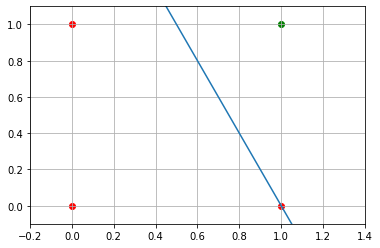

In [ ]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

a = -2
b = 2
ax.plot(X, a * X + b )
plt.grid()
plt.plot()

Você deve estar se perguntando como essa reta foi achada, muito simples o**s pesos que nós encontramos são a reta**, só é preciso colocar ela na forma y=ax+b que todos conhecem.